In [1]:
!pip install ucimlrepo

In [2]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
mushroom = fetch_ucirepo(id=73)

# data (as pandas dataframes)
X = mushroom.data.features
y = mushroom.data.targets

# metadata
print(mushroom.metadata)

# variable information
print(mushroom.variables)

{'uci_id': 73, 'name': 'Mushroom', 'repository_url': 'https://archive.ics.uci.edu/dataset/73/mushroom', 'data_url': 'https://archive.ics.uci.edu/static/public/73/data.csv', 'abstract': 'From Audobon Society Field Guide; mushrooms described in terms of physical characteristics; classification: poisonous or edible', 'area': 'Biology', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 8124, 'num_features': 22, 'feature_types': ['Categorical'], 'demographics': [], 'target_col': ['poisonous'], 'index_col': None, 'has_missing_values': 'yes', 'missing_values_symbol': 'NaN', 'year_of_dataset_creation': 1981, 'last_updated': 'Thu Aug 10 2023', 'dataset_doi': '10.24432/C5959T', 'creators': [], 'intro_paper': None, 'additional_info': {'summary': "This data set includes descriptions of hypothetical samples corresponding to 23 species of gilled mushrooms in the Agaricus and Lepiota Family (pp. 500-525).  Each species is identified as definitely edible, definitely po

In [3]:
mushroom

{'data': {'ids': None,
  'features':      cap-shape cap-surface cap-color bruises odor gill-attachment  \
  0            x           s         n       t    p               f   
  1            x           s         y       t    a               f   
  2            b           s         w       t    l               f   
  3            x           y         w       t    p               f   
  4            x           s         g       f    n               f   
  ...        ...         ...       ...     ...  ...             ...   
  8119         k           s         n       f    n               a   
  8120         x           s         n       f    n               a   
  8121         f           s         n       f    n               a   
  8122         k           y         n       f    y               f   
  8123         x           s         n       f    n               a   
  
       gill-spacing gill-size gill-color stalk-shape  ...  \
  0               c         n          k         

In [4]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt
from sklearn.metrics import precision_score, recall_score, f1_score
from graphviz import Digraph

In [5]:
from ucimlrepo import fetch_ucirepo
import pandas as pd

# Fetch the Mushroom dataset
mushroom = fetch_ucirepo(id=73)

# Convert features and target to a pandas DataFrame
df = pd.DataFrame(mushroom.data.features)
df['class'] = mushroom.data.targets  # Add the target column

# Now check the columns
print(df.columns)  # Shows all column names
print(df.head())   # Displays the first 5 rows

Index(['cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor',
       'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color',
       'stalk-shape', 'stalk-root', 'stalk-surface-above-ring',
       'stalk-surface-below-ring', 'stalk-color-above-ring',
       'stalk-color-below-ring', 'veil-type', 'veil-color', 'ring-number',
       'ring-type', 'spore-print-color', 'population', 'habitat', 'class'],
      dtype='object')
  cap-shape cap-surface cap-color bruises odor gill-attachment gill-spacing  \
0         x           s         n       t    p               f            c   
1         x           s         y       t    a               f            c   
2         b           s         w       t    l               f            c   
3         x           y         w       t    p               f            c   
4         x           s         g       f    n               f            w   

  gill-size gill-color stalk-shape  ... stalk-color-above-ring  \
0         n          k   

In [6]:
print(df.columns)

Index(['cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor',
       'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color',
       'stalk-shape', 'stalk-root', 'stalk-surface-above-ring',
       'stalk-surface-below-ring', 'stalk-color-above-ring',
       'stalk-color-below-ring', 'veil-type', 'veil-color', 'ring-number',
       'ring-type', 'spore-print-color', 'population', 'habitat', 'class'],
      dtype='object')


In [7]:
print(df.isnull().sum())

cap-shape                      0
cap-surface                    0
cap-color                      0
bruises                        0
odor                           0
gill-attachment                0
gill-spacing                   0
gill-size                      0
gill-color                     0
stalk-shape                    0
stalk-root                  2480
stalk-surface-above-ring       0
stalk-surface-below-ring       0
stalk-color-above-ring         0
stalk-color-below-ring         0
veil-type                      0
veil-color                     0
ring-number                    0
ring-type                      0
spore-print-color              0
population                     0
habitat                        0
class                          0
dtype: int64


In [8]:
df_cleaned = df.dropna()

In [9]:
print(df.isnull().sum())

cap-shape                      0
cap-surface                    0
cap-color                      0
bruises                        0
odor                           0
gill-attachment                0
gill-spacing                   0
gill-size                      0
gill-color                     0
stalk-shape                    0
stalk-root                  2480
stalk-surface-above-ring       0
stalk-surface-below-ring       0
stalk-color-above-ring         0
stalk-color-below-ring         0
veil-type                      0
veil-color                     0
ring-number                    0
ring-type                      0
spore-print-color              0
population                     0
habitat                        0
class                          0
dtype: int64


In [10]:
print(df.dtypes)
print(df['class'].value_counts())

cap-shape                   object
cap-surface                 object
cap-color                   object
bruises                     object
odor                        object
gill-attachment             object
gill-spacing                object
gill-size                   object
gill-color                  object
stalk-shape                 object
stalk-root                  object
stalk-surface-above-ring    object
stalk-surface-below-ring    object
stalk-color-above-ring      object
stalk-color-below-ring      object
veil-type                   object
veil-color                  object
ring-number                 object
ring-type                   object
spore-print-color           object
population                  object
habitat                     object
class                       object
dtype: object
class
e    4208
p    3916
Name: count, dtype: int64


In [15]:
from sklearn.preprocessing import LabelEncoder

# Initialize LabelEncoder
le = LabelEncoder()

# Apply LabelEncoder to each feature and target column
df_encoded = df.apply(le.fit_transform)

# Check the first few rows of the encoded dataset
print(df_encoded.head())

   cap-shape  cap-surface  cap-color  bruises  odor  gill-attachment  \
0          5            2          4        1     6                1   
1          5            2          9        1     0                1   
2          0            2          8        1     3                1   
3          5            3          8        1     6                1   
4          5            2          3        0     5                1   

   gill-spacing  gill-size  gill-color  stalk-shape  ...  \
0             0          1           4            0  ...   
1             0          0           4            0  ...   
2             0          0           5            0  ...   
3             0          1           5            0  ...   
4             1          0           4            1  ...   

   stalk-color-above-ring  stalk-color-below-ring  veil-type  veil-color  \
0                       7                       7          0           2   
1                       7                       7     

In [16]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report

# Split the dataset into features and target variable
X = df_encoded.drop('class', axis=1)  # Features
y = df_encoded['class']  # Target

# Split the data into 80% training and 20% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the DecisionTreeClassifier
clf = DecisionTreeClassifier(random_state=42)

# Train the classifier
clf.fit(X_train, y_train)

# Predict on the test set
y_pred = clf.predict(X_test)

# Print classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       843
           1       1.00      1.00      1.00       782

    accuracy                           1.00      1625
   macro avg       1.00      1.00      1.00      1625
weighted avg       1.00      1.00      1.00      1625



In [17]:
from sklearn.tree import export_graphviz
from graphviz import Source

# Export the tree to a dot format
dot_data = export_graphviz(
    clf,
    out_file=None,
    feature_names=X.columns,
    class_names=le.classes_.astype(str),  # Convert class names to string
    filled=True,
    special_characters=True  # Handles special characters
)

# Create a Source object to visualize the tree
graph = Source(dot_data)
graph.render("mushroom_decision_tree", format="png", view=True)  # Saves the tree as a PNG file and opens it

'mushroom_decision_tree.png'

In [18]:
from sklearn.model_selection import cross_val_score

# Perform 5-fold cross-validation
cv_scores = cross_val_score(clf, X, y, cv=5)

print("Cross-validation scores:", cv_scores)
print("Average cross-validation score:", cv_scores.mean())

Cross-validation scores: [0.84246154 1.         0.99384615 1.         0.92610837]
Average cross-validation score: 0.9524832133383858


In [19]:
from sklearn.model_selection import GridSearchCV

# Define hyperparameters to tune
param_grid = {
    'max_depth': [3, 5, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
}

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=clf, param_grid=param_grid, cv=5, scoring='accuracy')

# Fit GridSearchCV
grid_search.fit(X_train, y_train)

# Best parameters and best score
print("Best parameters found: ", grid_search.best_params_)
print("Best cross-validation score: ", grid_search.best_score_)

# Re-evaluate the best model on the test set
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)
print(classification_report(y_test, y_pred))

Best parameters found:  {'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 2}
Best cross-validation score:  1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       843
           1       1.00      1.00      1.00       782

    accuracy                           1.00      1625
   macro avg       1.00      1.00      1.00      1625
weighted avg       1.00      1.00      1.00      1625



In [20]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score

# Define the models
rf_model = RandomForestClassifier(random_state=42)

# List of models for easy comparison
models = {'Random Forest': rf_model}

# Evaluate each model using cross-validation
for name, model in models.items():
    print(f"\n{name} model:")
    cv_scores = cross_val_score(model, X, y, cv=5)
    print(f"Cross-validation scores: {cv_scores}")
    print(f"Average cross-validation score: {cv_scores.mean()}")

    # Train and evaluate on the test data
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(f"Classification report for {name}:")
    print(classification_report(y_test, y_pred))


Random Forest model:
Cross-validation scores: [0.84246154 1.         1.         1.         0.63977833]
Average cross-validation score: 0.8964479727169383
Classification report for Random Forest:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       843
           1       1.00      1.00      1.00       782

    accuracy                           1.00      1625
   macro avg       1.00      1.00      1.00      1625
weighted avg       1.00      1.00      1.00      1625



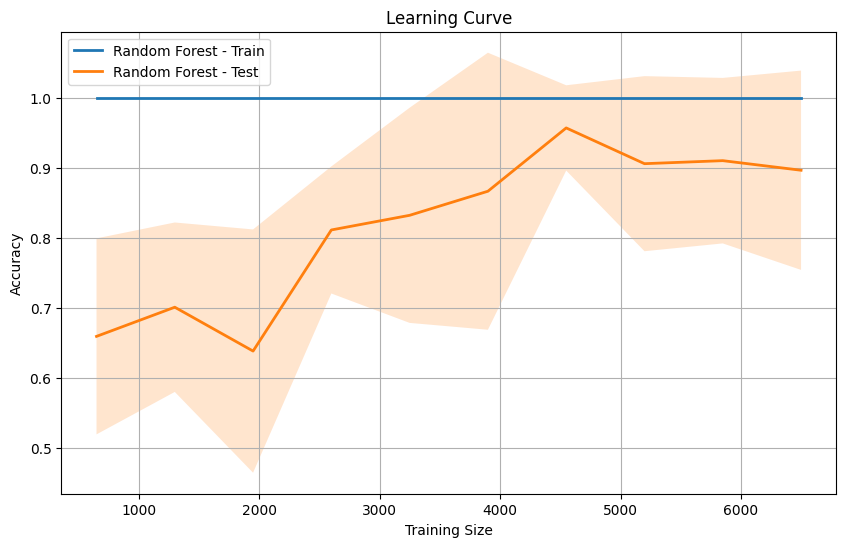

In [21]:
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve
import numpy as np

# Define the models
models = {
    'Random Forest': RandomForestClassifier(random_state=42)
}
# Create a plot for the learning curves
plt.figure(figsize=(10, 6))

# Iterate over each model and plot its learning curve
for name, model in models.items():
    train_sizes, train_scores, test_scores = learning_curve(
        model, X, y, cv=5, train_sizes=np.linspace(0.1, 1.0, 10), scoring='accuracy'
    )

    # Compute mean and std for train and test scores
    train_mean = train_scores.mean(axis=1)
    train_std = train_scores.std(axis=1)
    test_mean = test_scores.mean(axis=1)
    test_std = test_scores.std(axis=1)

    # Plot the learning curve for the model
    plt.plot(train_sizes, train_mean, label=f'{name} - Train', lw=2)
    plt.plot(train_sizes, test_mean, label=f'{name} - Test', lw=2)

    # Fill between train and test scores to show the variability
    plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.2)
    plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, alpha=0.2)

# Add labels and legend
plt.title('Learning Curve')
plt.xlabel('Training Size')
plt.ylabel('Accuracy')
plt.legend(loc='best')
plt.grid(True)
# Show the plot
plt.show()